In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sess = tf.InteractiveSession()


In [2]:
logits = np.array([[2, 1, 0], [0,1,2]], dtype=np.float32)
one_hot_labels = np.array([[0,1,0], [0,0,1]], dtype=np.int32)
sparse_labels = np.array([0,2], dtype=np.int32)

sparse_loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=sparse_labels)
softmax_loss = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_labels)

# weighted cross entropy is sigmoid. Requires targets to be same type as logits
targets = one_hot_labels.astype(np.float32)
weighted = tf.nn.weighted_cross_entropy_with_logits(targets, logits, pos_weight=1)
weighted_2 = tf.nn.weighted_cross_entropy_with_logits(targets, logits, pos_weight=2)
weighted_neg_1 = tf.nn.weighted_cross_entropy_with_logits(targets, logits, pos_weight=-1)

print 'sparse softmax crossentropy', sess.run(tf.reduce_mean(sparse_loss))
print 'regular softmax cross entropy', sess.run(tf.reduce_mean(softmax_loss))
print 'weighted cross weight 1', sess.run(tf.reduce_mean(weighted))
print 'weighted cross weight 2', sess.run(tf.reduce_mean(weighted_2))
print 'weighted cross weight -1', sess.run(tf.reduce_mean(weighted_neg_1))


sparse softmax crossentropy 0.407606
regular softmax cross entropy 0.907606
weighted cross weight 1 0.877779
weighted cross weight 2 0.951144
weighted cross weight -1 0.731049


In [3]:
n = 100
logits = np.reshape(np.linspace(-10,10, n), (n,1))
labels = np.zeros((n,1), dtype=np.int32) + 1
targets = np.zeros((n,1) ) + 1


softmax_loss = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels)
weighted_loss_1 = tf.nn.weighted_cross_entropy_with_logits(targets, logits, pos_weight=1)
weighted_loss_2 = tf.nn.weighted_cross_entropy_with_logits(targets, logits, pos_weight=2)
weighted_loss_3 = tf.nn.weighted_cross_entropy_with_logits(targets, logits, pos_weight=3)
weighted_loss_neg_1 = tf.nn.weighted_cross_entropy_with_logits(targets, logits, pos_weight=-1)
weighted_loss_zero = tf.nn.weighted_cross_entropy_with_logits(targets, logits, pos_weight=0)

sl = sess.run(softmax_loss)
w1 = np.squeeze(sess.run(weighted_loss_1))
w2 = np.squeeze(sess.run(weighted_loss_2))
w3 = np.squeeze(sess.run(weighted_loss_3))
wneg1 = np.squeeze(sess.run(weighted_loss_neg_1))
w0= np.squeeze(sess.run(weighted_loss_zero))



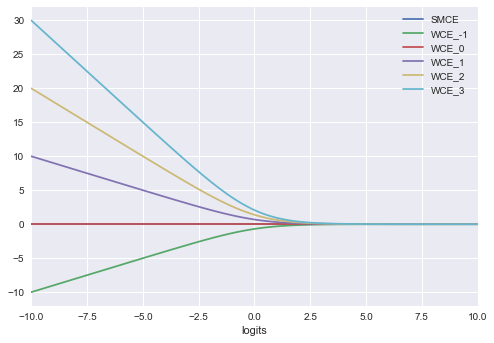

In [4]:
data = {'logits':np.squeeze(logits), 'SMCE':sl, 'WCE_-1':wneg1, 'WCE_0': w0, 'WCE_1':w1, 'WCE_2':w2, 'WCE_3':w3}
df = pd.DataFrame.from_dict(data)
df.plot(x='logits')
plt.show()

In [33]:
n = 10
logits = np.array([np.linspace(-10,10, n), np.linspace(10,-10, n)]).T
labels = np.array([1] * n)
targets = np.array([np.zeros(n, dtype=np.float32), [1] *n]).T

softmax_loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels)
weighted_loss_1 = tf.nn.weighted_cross_entropy_with_logits(targets, logits, pos_weight=1)
weighted_loss_2 = tf.nn.weighted_cross_entropy_with_logits(targets, logits, pos_weight=2)
weighted_loss_3 = tf.nn.weighted_cross_entropy_with_logits(targets, logits, pos_weight=3)
weighted_loss_neg_1 = tf.nn.weighted_cross_entropy_with_logits(targets, logits, pos_weight=-1)
weighted_loss_zero = tf.nn.weighted_cross_entropy_with_logits(targets, logits, pos_weight=0)

sl = sess.run(softmax_loss)
w1 = np.mean(sess.run(weighted_loss_1), 1)
w2 = np.mean(sess.run(weighted_loss_2), 1)
w3 = np.mean(sess.run(weighted_loss_3), 1)
wneg1 = np.mean(sess.run(weighted_loss_neg_1), 1)
w0= np.mean(sess.run(weighted_loss_zero), 1)
#print diff_logits.shape

diff_logits  = logits[:,1] - logits[:,0]

{'WCE_3': array([  9.07977984e-05,   8.37708783e-04,   7.71693335e-03,
         7.01048322e-02,   5.69143964e-01,   2.79136619e+00,
         6.73677150e+00,   1.11188280e+01,   1.55563933e+01,
         2.00000908e+01]), 'WCE_2': array([  6.80983488e-05,   6.28281588e-04,   5.78770001e-03,
         5.25786241e-02,   4.26857973e-01,   2.09352464e+00,
         5.05257862e+00,   8.33912103e+00,   1.16672949e+01,
         1.50000681e+01]), 'logits': array([ 20.        ,  15.55555556,  11.11111111,   6.66666667,
         2.22222222,  -2.22222222,  -6.66666667, -11.11111111,
       -15.55555556, -20.        ]), 'WCE_0': array([  2.26994496e-05,   2.09427196e-04,   1.92923334e-03,
         1.75262080e-02,   1.42285991e-01,   6.97841547e-01,
         1.68419287e+00,   2.77970701e+00,   3.88909832e+00,
         5.00002270e+00]), 'SMCE': array([  2.06115369e-09,   1.75512487e-07,   1.49452268e-05,
         1.27182469e-03,   1.02888684e-01,   2.32511091e+00,
         6.66793849e+00,   1.11111261e+

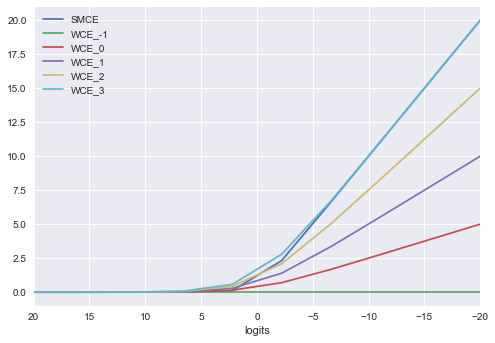

In [34]:
data = {'logits':diff_logits, 'SMCE':sl, 'WCE_-1':wneg1, 'WCE_0': w0, 'WCE_1':w1, 'WCE_2':w2, 'WCE_3':w3}
print data
df = pd.DataFrame.from_dict(data)
df.plot(x='logits')
plt.show()